# I. IMPORT MODUL

<i>Melakukan import modul pandas, numpy dan juga matplotlib. Chained assignment pada pandas dinon-aktifkan dan format pandas secara global untuk angka diubah menjadi :,.2f</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from jupyterthemes import jtplot

# menonaktifkan chained assignment pada pandas
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format

# setting dpi matplotlib
mpl.rcParams['figure.dpi']= 150
%config InlineBackend.figure_format = 'retina'

# setting tema jupyter untuk plotting
jtplot.style(theme='monokai')

# setting formatter untuk floating tanpa koma di belakang
format_float0 = "{:,.0f}".format

# setting periode berdasar data
periode = "2020 - 2022 YTD"

# II. MEMBACA DAN MERUBAH FORMAT DATA PADA DATAFRAME

<p><i>Data yang digunakan dalam analisa ini adalah data penjualan PT Panatrade Caraka 2020 - 2022 (cut off bulan Maret 2022). Data ini didapat dengan menggunakan penggabungan beberapa sales data dalam format csv. Adapun pembersihan terhadap data dilakukan dengan menambahkan kolom 'brand_m' yang merupakan 3 karakter pertama dari kolom 'brand' dan kolom 'division' yang merupakan 1 karakter pertama dari kolom 'categ' serta dilakukan drop kolom untuk 'brand', 'categ' dan '%' setelahnya.</i></p>
<p><i>Kolom 'brand_m' merupakan kolom modifikasi dimana brand hanya menggunakan 3 karakter.<br>
Kolom 'division' merupakan product division dari sku (F untuk Footwear, A untuk Apparel dan H untuk Equipment).<br>
Kolom '%' didrop karena data ini bisa kita generate nantinya.</i></p>


In [2]:
data = pd.concat(map(pd.read_csv, ['Sales2022.csv', 'Sales2021.csv', 'Sales2020.csv']))
data['brand_m'] = data['brand'].str[:3]
data['division'] = data['categ'].str[:1]
data.drop(['categ', '%', 'brand'], axis=1)
data

c:\users\johan\appdata\local\programs\python\python37\lib\site-packages\pandas\core\reshape\concat.py:304: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,


,Art,Desc.,Category,Quantity,Bruto,Net,Cogs,Profit,%,season,...,loc,customer,sportcast,inv,Id Cust,period,month,date,brand_m,division
0,P10737-41,DERBY-BLACK/ORANGE/WHITE,FWEAR,6,"2,278,800.00","1,595,160.00","1,237,968.00","357,192.00",30.00%,2021,...,DMA,CARI SEPATU - YOGYAKARTA ( CBD ),LS,PDF2200001,104C016,1,JAN,1/10/2022,PIE,F
1,P30179-43,NEOWAVE-BLACK/PHANTOM/WHITE,FWEAR,3,"1,049,400.00","734,580.00","542,407.68","192,172.32",30.00%,2021,...,DMA,CARI SEPATU - YOGYAKARTA ( CBD ),AC,PDF2200001,104C016,1,JAN,1/10/2022,PIE,F
2,P30200-43,VX-WAVE-BLACK/WHITE,FWEAR,4,"1,399,200.00","979,440.00","676,760.36","302,679.64",30.00%,2021,...,DMA,CARI SEPATU - YOGYAKARTA ( CBD ),LS,PDF2200001,104C016,1,JAN,1/10/2022,PIE,F
3,P20824-40,CITY RACE-NAVY/GREY/WHITE,FWEAR,2,"759,600.00","531,720.00","380,929.44","150,790.56",30.00%,2021,...,DMA,CARI SEPATU - YOGYAKARTA ( CBD ),ES,PDF2200001,104C016,1,JAN,1/10/2022,PIE,F
4,P30178-45,NEOWAVE-OLIVE/BLACK/WHITE,FWEAR,2,"699,600.00","489,720.00","361,605.12","128,114.88",30.00%,2021,...,DMA,CARI SEPATU - YOGYAKARTA ( CBD ),AC,PDF2200001,104C016,1,JAN,1/10/2022,PIE,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142398,901845-XL,DUPA TS - DARK NAVY/WHITE,AOTHR,1,"119,800.00","56,138.28","12,529.02","43,609.26",53.14%,2016,...,CSPRI,PRESTASI RETAIL INNOVATION PT,FB,RSA201200154,220P001,12,DEC,12/30/2020,SPE,A
142399,903403-NS,SPECS STRING BAG - RED/WHITE,HBAGS,1,"59,800.00","28,022.28","16,309.09","11,713.19",53.14%,2019,...,CSPRI,PRESTASI RETAIL INNOVATION PT,TR,RSA201200154,220P001,12,DEC,12/30/2020,SPE,H
142400,902523-NS,OPTIMUS BIBS - ELECTRICITY GREEN/NAVY BLUE,AOTHR,1,"89,800.00","42,080.28","10,186.55","31,893.73",53.14%,2018,...,CSPRI,PRESTASI RETAIL INNOVATION PT,FB,RSA201200154,220P001,12,DEC,12/30/2020,SPE,A
142401,902523-NS,OPTIMUS BIBS - ELECTRICITY GREEN/NAVY BLUE,AOTHR,7,"628,600.00","294,561.96","71,305.85","223,256.11",53.14%,2018,...,CSPRI,PRESTASI RETAIL INNOVATION PT,FB,RSA201200154,220P001,12,DEC,12/30/2020,SPE,A


In [3]:
# Merubah dtype beberapa kolom dari object menjadi float64
data.Quantity = data.Quantity.str.replace(',','').astype(float)
data.Bruto = data.Bruto.str.replace(',','').astype(float)
data.Net = data.Net.str.replace(',','').astype(float)
data.Cogs = data.Cogs.str.replace(',','').astype(float)
data.Profit = data.Profit.str.replace(',','').astype(float)
data.dtypes

Art           object
Desc.         object
Category      object
Quantity     float64
Bruto        float64
Net          float64
Cogs         float64
Profit       float64
%             object
season         int64
brand         object
categ         object
loc           object
customer      object
sportcast     object
inv           object
Id Cust       object
period         int64
month         object
date          object
brand_m       object
division      object
dtype: object

Berdasarkan data yang diberikan, masih terdapat redundancy pada customer name ('customer') untuk customer code ('Id Cust'). Hal ini dapat dilihat dari jumlah unique 'customer' pada beberapa 'Id Cust' yang nilainya lebih dari 1 seperti dapat dilihat di bawah. Maka dengan demikian beberapa grouping yang akan menggunakan irisan customer akan lebih terkonsentrasi menggunakan 'Id Cust' ketimbang 'customer'.

In [4]:
data.nunique()

Art          14914
Desc.         2914
Category        16
Quantity       504
Bruto         5051
Net          14502
Cogs         37633
Profit       69003
%              269
season          12
brand            6
categ           16
loc             20
customer       770
sportcast       22
inv          37694
Id Cust        348
period          12
month           12
date           470
brand_m          6
division         3
dtype: int64

In [5]:
cust_map = data[['Id Cust', 'customer']].groupby(['Id Cust']).nunique()
print(cust_map.head(10))

          customer
Id Cust           
1.01E+07         1
1.01E+08         1
1.02E+11         1
1.04E+04         1
1.04E+07         1
101A003          1
101A005          4
101A024          2
101A026          1
101B001          1


# III. MEMILIH DATA

In [6]:
# Memilih data secara spesifik
data_terpilih = data[['Art', 'brand_m', 'division', 'Quantity', 'Bruto', 'Net', 'Cogs', 'Profit', 'brand', 'Id Cust', 'date']]

# IV. PERHITUNGAN DISKON

$
\begin{align}
disc = \frac{bruto - net}{bruto}
\end{align}
$

In [7]:
data_terpilih['discount_per_baris'] = (data_terpilih['Bruto'] - data_terpilih['Net']) / data_terpilih['Bruto']
data_terpilih['margin_per_baris'] = (data_terpilih['Net'] - data_terpilih['Cogs']) / data_terpilih['Net']

Terdapat data dengan nilai penjualan bruto sama dengan 0 yang menyebabkan munculnya error pada kolom discount atau infinite karena melakukan pembagian terhadap 0. Seperti dapat dilihat dari data_terpilih.describe() di bawah ini yang menunjukkan bahwa mean dan juga min dari kolom discount adalah -inf. Oleh karena itu pada cell selanjutnya kita akan melakukan drop terhadap baris data dengan penjualan bruto 0.

In [8]:
# Informasi dasar data_terpilih
print(data_terpilih.describe())

        Quantity          Bruto            Net           Cogs         Profit  \
count 297,000.00     313,716.00     313,716.00     313,716.00     313,716.00   
mean        9.25   3,092,576.62   1,752,416.51   1,260,592.23     491,824.28   
std        46.66   8,958,593.78   4,339,259.74   3,516,407.31   1,238,547.22   
min         0.00           0.00           0.00    -663,997.65 -22,692,737.43   
25%         2.00     579,800.00     384,860.00     249,550.10     118,098.00   
50%         3.00   1,139,400.00     747,728.00     490,288.08     239,584.86   
75%         6.00   2,399,200.00   1,552,086.00   1,031,235.73     491,216.22   
max     7,800.00 499,600,000.00 262,290,000.00 184,894,004.50  94,125,000.00   

       discount_per_baris  margin_per_baris  
count          313,534.00        313,534.00  
mean                 -inf              0.26  
std                   NaN             16.02  
min                  -inf         -5,217.84  
25%                  0.31              0.29  
50%

In [9]:
data_terpilih = data_terpilih[data_terpilih['Bruto'] != 0]
data_terpilih['frekuensi_transaksi'] = 1

# Memisahkan data dengan penjualan normal (tingkat discount di bawah 50%) dan penjualan diskon (tingkat discount di atas dan sama dengan 50%)
data_terpilih_normal = data_terpilih[data_terpilih['discount_per_baris'] < 0.5]
data_terpilih_diskon = data_terpilih[data_terpilih['discount_per_baris'] >= 0.5]

## IV.a SEMUA PENJUALAN

In [10]:
print(data_terpilih.describe())

        Quantity          Bruto            Net           Cogs         Profit  \
count 296,502.00     313,186.00     313,186.00     313,186.00     313,186.00   
mean        9.26   3,097,810.14   1,754,975.12   1,262,372.95     492,602.18   
std        46.69   8,965,266.71   4,342,467.47   3,519,098.01   1,239,447.72   
min         1.00      18,800.00       2,480.00    -663,997.65 -22,692,737.43   
25%         2.00     579,800.00     384,860.00     250,005.37     118,514.04   
50%         3.00   1,159,600.00     747,728.00     490,588.98     240,393.22   
75%         6.00   2,399,400.00   1,553,864.00   1,032,360.04     492,052.00   
max     7,800.00 499,600,000.00 262,290,000.00 184,894,004.50  94,125,000.00   

       discount_per_baris  margin_per_baris  frekuensi_transaksi  
count          313,186.00        313,186.00           313,186.00  
mean                 0.36              0.31                 1.00  
std                  0.10              0.29                 0.00  
min        

## IV.b PENJUALAN NORMAL

In [11]:
print(data_terpilih_normal.describe())

        Quantity          Bruto            Net           Cogs        Profit  \
count 257,210.00     272,988.00     272,988.00     272,988.00    272,988.00   
mean        7.21   2,284,587.38   1,532,483.19     998,190.26    534,292.94   
std        34.48   5,610,917.84   3,740,023.10   2,625,503.66  1,237,525.90   
min         1.00      20,000.00      15,376.00    -574,414.64 -4,233,978.33   
25%         1.00     549,800.00     384,860.00     243,696.45    133,451.78   
50%         2.00   1,099,600.00     736,732.00     474,996.88    258,303.36   
75%         5.00   2,199,200.00   1,473,464.00     927,611.16    515,502.00   
max     5,235.00 499,600,000.00 262,290,000.00 184,894,004.50 94,125,000.00   

       discount_per_baris  margin_per_baris  frekuensi_transaksi  
count          272,988.00        272,988.00           272,988.00  
mean                 0.33              0.35                 1.00  
std                  0.03              0.07                 0.00  
min                 

### IV.b.1 ANALISA BERDASAR TINGKAT DISKON PER BARIS TRANSAKSI

In [12]:
net_berdasar_disc = data_terpilih_normal[['discount_per_baris', 'Net', 'frekuensi_transaksi']].groupby(['discount_per_baris']).sum()
with pd.option_context('display.max_rows', None):
    print(net_berdasar_disc.sort_values(by=['Net'], ascending=False))

                                  Net  frekuensi_transaksi
discount_per_baris                                        
0.33               202,435,965,038.00               136704
0.30                78,733,998,140.00                52859
0.35                27,205,627,020.00                11942
0.38                21,757,632,472.00                15469
0.40                14,558,451,180.00                 3952
0.31                13,037,910,042.00                11403
0.32                12,208,280,448.00                12127
0.00                 6,920,325,600.00                  287
0.35                 5,578,830,234.00                  650
0.41                 4,785,928,758.00                 1209
0.27                 4,445,090,158.00                 5302
0.29                 3,756,455,504.00                 3803
0.28                 3,189,646,440.00                 3954
0.34                 2,478,582,680.00                 2357
0.37                 1,961,415,666.00                 13

In [13]:
print(net_berdasar_disc.describe())

                     Net  frekuensi_transaksi
count             113.00               113.00
mean    3,702,208,162.16             2,415.82
std    20,603,248,895.28            13,879.42
min           140,000.00                 1.00
25%         5,197,398.07                 2.00
50%        31,591,284.00                 9.00
75%       304,129,950.00               133.00
max   202,435,965,038.00           136,704.00


### IV.b.2 ANALISA BERDASAR CUSTOMER

In [14]:
net_berdasar_cust = data_terpilih_normal[['Id Cust', 'Net']].groupby(['Id Cust']).sum()

#### IV.b.2.1 TOTAL NILAI NET SALES

In [15]:
net_berdasar_cust.sum()

Net   418,349,522,324.62
dtype: float64

#### IV.b.2.2 NET SALES BERDASAR CUSTOMER

In [16]:
print(net_berdasar_cust.describe())

                    Net
count            344.00
mean   1,216,132,332.34
std    3,123,164,811.92
min           39,800.00
25%       43,674,330.00
50%      226,606,467.00
75%    1,031,640,159.00
max   36,220,967,218.00


#### IV.b.2.3 CUSTOMER DENGAN NILAI TOTAL PENJUALAN DI ATAS RATA - RATA
<i>Berikut adalah kontribusi net sales 2020 - 2022 YTD untuk customer dengan total nilai net sales di atas nilai rata - rata net sales dari semua customer (kecuali PT Prestasi Retail Innovation - 220P001)</i>

In [17]:
# Menslice customer dengan total nilai Net Sales di atas rata - rata Net Sales
cust_diatas_rerata = net_berdasar_cust.loc[(net_berdasar_cust['Net'] > net_berdasar_cust['Net'].mean()) & 
                                           (net_berdasar_cust.index != "220P001")].sort_values(by=['Net'], ascending=False)
net_mean = net_berdasar_cust['Net'].mean()
total_cust = net_berdasar_cust['Net'].count()
total_cust_diatas_rerata = cust_diatas_rerata['Net'].count()

with pd.option_context('display.max_rows', None):
    print(f'Berikut adalah daftar customer dengan total penjualan di atas rata - rata total penjualan periode {periode} (Rp {format_float0(net_mean)}): \n'
          f'Jumlah customer di atas rata - rata {total_cust_diatas_rerata} orang dari total customer {total_cust} orang\n{cust_diatas_rerata}')

Berikut adalah daftar customer dengan total penjualan di atas rata - rata total penjualan periode 2020 - 2022 YTD (Rp 1,216,132,332): 
Jumlah customer di atas rata - rata 77 orang dari total customer 344 orang
                      Net
Id Cust                  
104A019 36,220,967,218.00
101G012 23,398,958,242.00
105A009 23,021,827,330.00
101I020 10,968,703,171.00
101M018 10,239,439,158.00
101K003  9,654,975,979.00
102L004  9,243,403,779.50
102S008  8,668,741,114.00
101K011  8,063,359,046.00
101D010  7,332,266,088.00
104C004  7,293,818,258.00
101F003  6,990,350,258.00
103P001  6,751,407,288.00
107M002  6,606,956,623.00
102S009  6,573,863,592.00
102G006  6,268,568,294.00
102M014  6,220,965,438.00
102I005  6,098,193,000.00
102S015  5,888,689,001.16
102P008  5,578,720,454.00
101S014  5,108,099,620.80
101S005  4,871,792,924.00
102A014  4,438,285,694.00
102A004  4,346,395,686.00
104S016  4,244,198,094.00
105O004  4,225,694,512.00
101M017  3,854,485,098.00
112A002  3,853,938,423.43
102I001  3

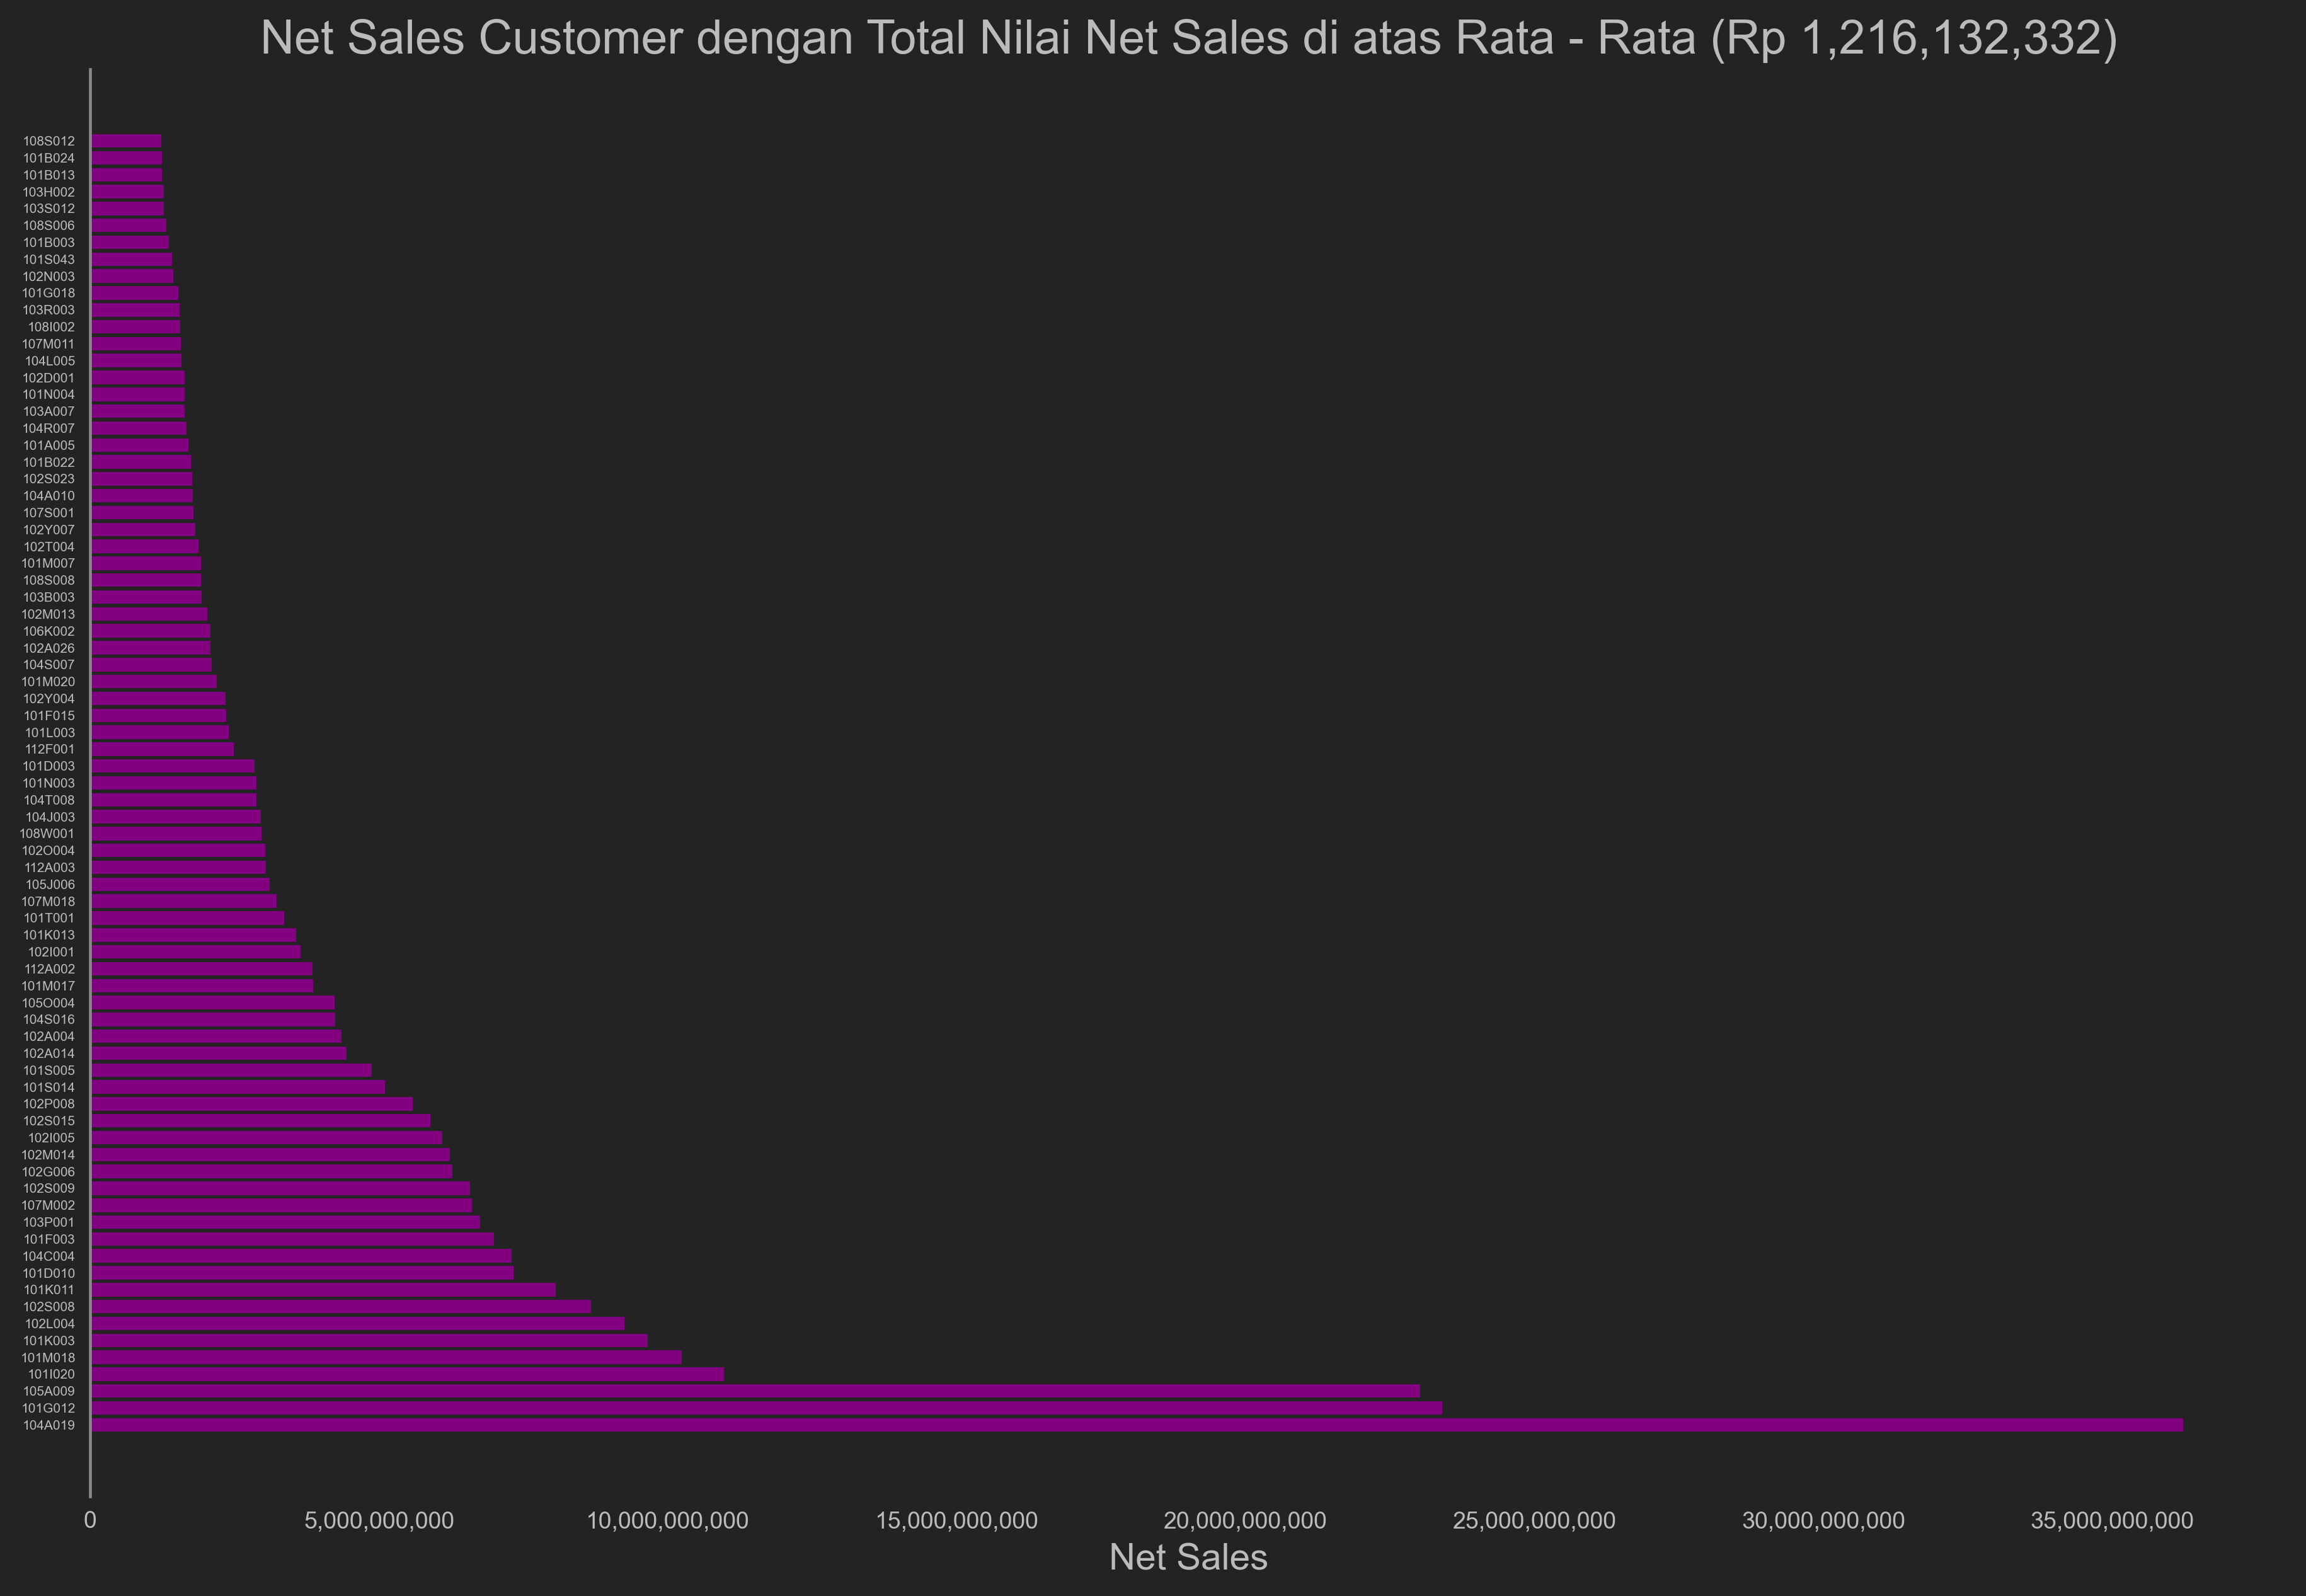

In [18]:
plt.figure(figsize=(15,10))
plt.barh(cust_diatas_rerata.index, cust_diatas_rerata['Net'], color='purple')
plt.xlabel("Net Sales", fontsize=14)
plt.title(f"Net Sales Customer dengan Total Nilai Net Sales di atas Rata - Rata (Rp {format_float0(net_berdasar_cust['Net'].mean())})", fontsize=18)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)
plt.yticks(fontsize=5)
plt.xticks(fontsize=9)
plt.show()

#### IV.b.2.4 TOP 3 CUSTOMER

In [19]:
net_berdasar_disc_cust = data_terpilih_normal[['Id Cust', 'discount_per_baris', 'Net']].groupby(['Id Cust', 'discount_per_baris']).sum()
print(net_berdasar_disc_cust.iloc[net_berdasar_disc_cust.index.get_level_values('Id Cust') == '104A019'])
print(net_berdasar_disc_cust.iloc[net_berdasar_disc_cust.index.get_level_values('Id Cust') == '101G012'])
print(net_berdasar_disc_cust.iloc[net_berdasar_disc_cust.index.get_level_values('Id Cust') == '105A009'])

                                         Net
Id Cust discount_per_baris                  
104A019 0.30               11,294,376,380.00
        0.32                   88,334,992.00
        0.33               18,529,096,024.00
        0.35                2,427,835,410.00
        0.38                1,764,045,824.00
        0.40                  611,094,480.00
        0.41                  244,246,860.00
        0.45                  258,217,630.00
        0.49                1,003,719,618.00
                                         Net
Id Cust discount_per_baris                  
101G012 0.15                  245,636,400.00
        0.30                5,014,764,580.00
        0.33               14,625,286,352.00
        0.34                    8,522,712.00
        0.35                1,313,725,010.00
        0.38                   71,462,016.00
        0.38                1,317,023,096.00
        0.38                   13,278,720.00
        0.40                  309,808,800.00
        0.

### IV.b.3 ANALISA BERDASAR TINGKAT DISKON KESELURUHAN TRANSAKSI

In [20]:
disc_rerata_cust = data_terpilih_normal[['Id Cust', 'Quantity', 'Bruto', 'Net', 'Cogs', 'frekuensi_transaksi']].groupby(['Id Cust']).sum()
disc_rerata_cust['rerata_disc'] = (disc_rerata_cust['Bruto'] - disc_rerata_cust['Net']) / disc_rerata_cust['Bruto']
disc_rerata_cust['rerata_margin'] = (disc_rerata_cust['Net'] - disc_rerata_cust['Cogs']) / disc_rerata_cust['Net']
disc_rerata_cust['rerata_spending'] = (disc_rerata_cust['Bruto'] / disc_rerata_cust['Quantity'])
disc_rerata_cust['ATV'] = disc_rerata_cust['Net'] / disc_rerata_cust['frekuensi_transaksi']
disc_rerata_cust.sort_values(by='rerata_disc', ascending=False)
disc_rerata_cust

,Quantity,Bruto,Net,Cogs,frekuensi_transaksi,rerata_disc,rerata_margin,rerata_spending,ATV
Id Cust,,,,,,,,,
1.01E+07,707.00,"259,268,800.00","183,149,668.00","115,222,318.19",336,0.29,0.37,"366,716.83","545,088.30"
1.01E+08,30.00,"35,994,000.00","28,795,200.00","8,671,489.81",1,0.20,0.70,"1,199,800.00","28,795,200.00"
1.02E+11,"3,234.00","815,694,800.00","543,709,425.00","345,330,522.65",586,0.33,0.36,"252,224.74","927,831.78"
1.04E+04,286.00,"102,802,800.00","67,507,106.00","40,759,062.94",83,0.34,0.40,"359,450.35","813,338.63"
1.04E+07,"1,664.00","642,443,200.00","426,961,036.00","299,048,119.50",388,0.34,0.30,"386,083.65","1,100,415.04"
...,...,...,...,...,...,...,...,...,...
112S005,20.00,"35,996,000.00","25,197,200.00","12,391,496.68",6,0.30,0.51,"1,799,800.00","4,199,533.33"
113C001,170.00,"52,686,000.00","48,929,370.00","14,071,364.66",65,0.07,0.71,"309,917.65","752,759.54"
113G001,184.00,"36,833,200.00","25,783,240.00","14,171,649.28",29,0.30,0.45,"200,180.43","889,077.24"


In [21]:
disc_rerata_cust.nunique()

Quantity               322
Bruto                  342
Net                    342
Cogs                   344
frekuensi_transaksi    276
rerata_disc            286
rerata_margin          344
rerata_spending        336
ATV                    343
dtype: int64

In [22]:
disc_rerata_cust['rerata_disc'].unique()

array([0.29359156, 0.2       , 0.33344012, 0.34333398, 0.33541045,
       0.29618394, 0.33093484, 0.32983794, 0.27      , 0.315     ,
       0.34608262, 0.34      , 0.32786861, 0.32856215, 0.32628891,
       0.31356038, 0.33433225, 0.30169461, 0.28996271, 0.30480576,
       0.31486394, 0.27678458, 0.29      , 0.27992587, 0.34219659,
       0.3998758 , 0.31869555, 0.28364003, 0.3       , 0.31738209,
       0.32462857, 0.25269871, 0.32851611, 0.28      , 0.32978424,
       0.31621951, 0.37319185, 0.34237269, 0.31277762, 0.4       ,
       0.27360155, 0.32      , 0.33688575, 0.32740522, 0.33822107,
       0.30239376, 0.31172323, 0.30596208, 0.30716244, 0.32463824,
       0.31710633, 0.31      , 0.3222571 , 0.32721458, 0.30456667,
       0.38340906, 0.32842999, 0.33017032, 0.32993148, 0.30259363,
       0.34688197, 0.31957859, 0.2941465 , 0.33730822, 0.29472706,
       0.31563849, 0.32187899, 0.32347048, 0.3331015 , 0.27390617,
       0.31090183, 0.3237695 , 0.33      , 0.35      , 0.34639

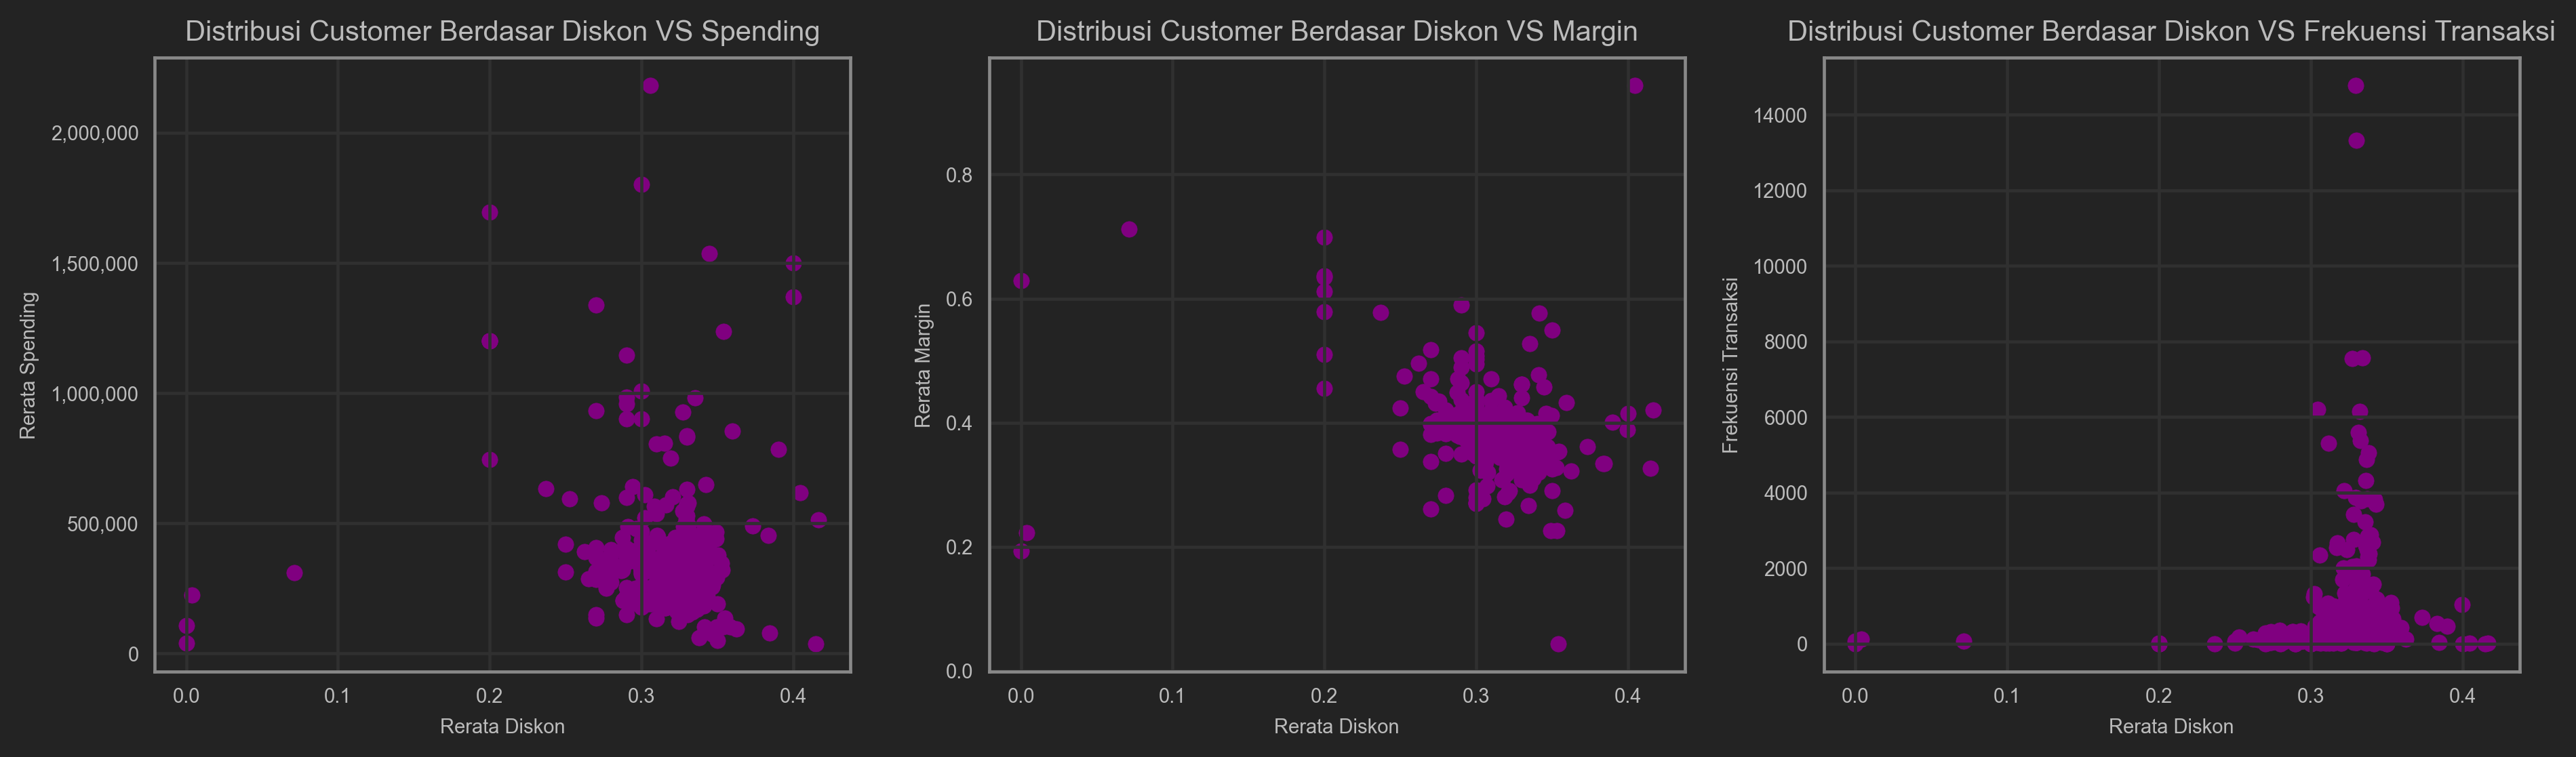

In [23]:
fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(disc_rerata_cust['rerata_disc'], disc_rerata_cust['rerata_spending'], c='purple')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_title('Distribusi Customer Berdasar Diskon VS Spending', fontsize=10)
ax1.set_xlabel('Rerata Diskon', fontsize=7)
ax1.set_ylabel('Rerata Spending', fontsize=7)
ax1.xaxis.set_tick_params(labelsize=7)
ax1.yaxis.set_tick_params(labelsize=7)

ax2.scatter(disc_rerata_cust['rerata_disc'], disc_rerata_cust['rerata_margin'], c='purple')
# ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.set_title('Distribusi Customer Berdasar Diskon VS Margin', fontsize=10)
ax2.set_xlabel('Rerata Diskon', fontsize=7)
ax2.set_ylabel('Rerata Margin', fontsize=7)
ax2.xaxis.set_tick_params(labelsize=7)
ax2.yaxis.set_tick_params(labelsize=7)

ax3.scatter(disc_rerata_cust['rerata_disc'], disc_rerata_cust['frekuensi_transaksi'], c='purple')
# ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax3.set_title('Distribusi Customer Berdasar Diskon VS Frekuensi Transaksi', fontsize=10)
ax3.set_xlabel('Rerata Diskon', fontsize=7)
ax3.set_ylabel('Frekuensi Transaksi', fontsize=7)
ax3.xaxis.set_tick_params(labelsize=7)
ax3.yaxis.set_tick_params(labelsize=7)
plt.show()

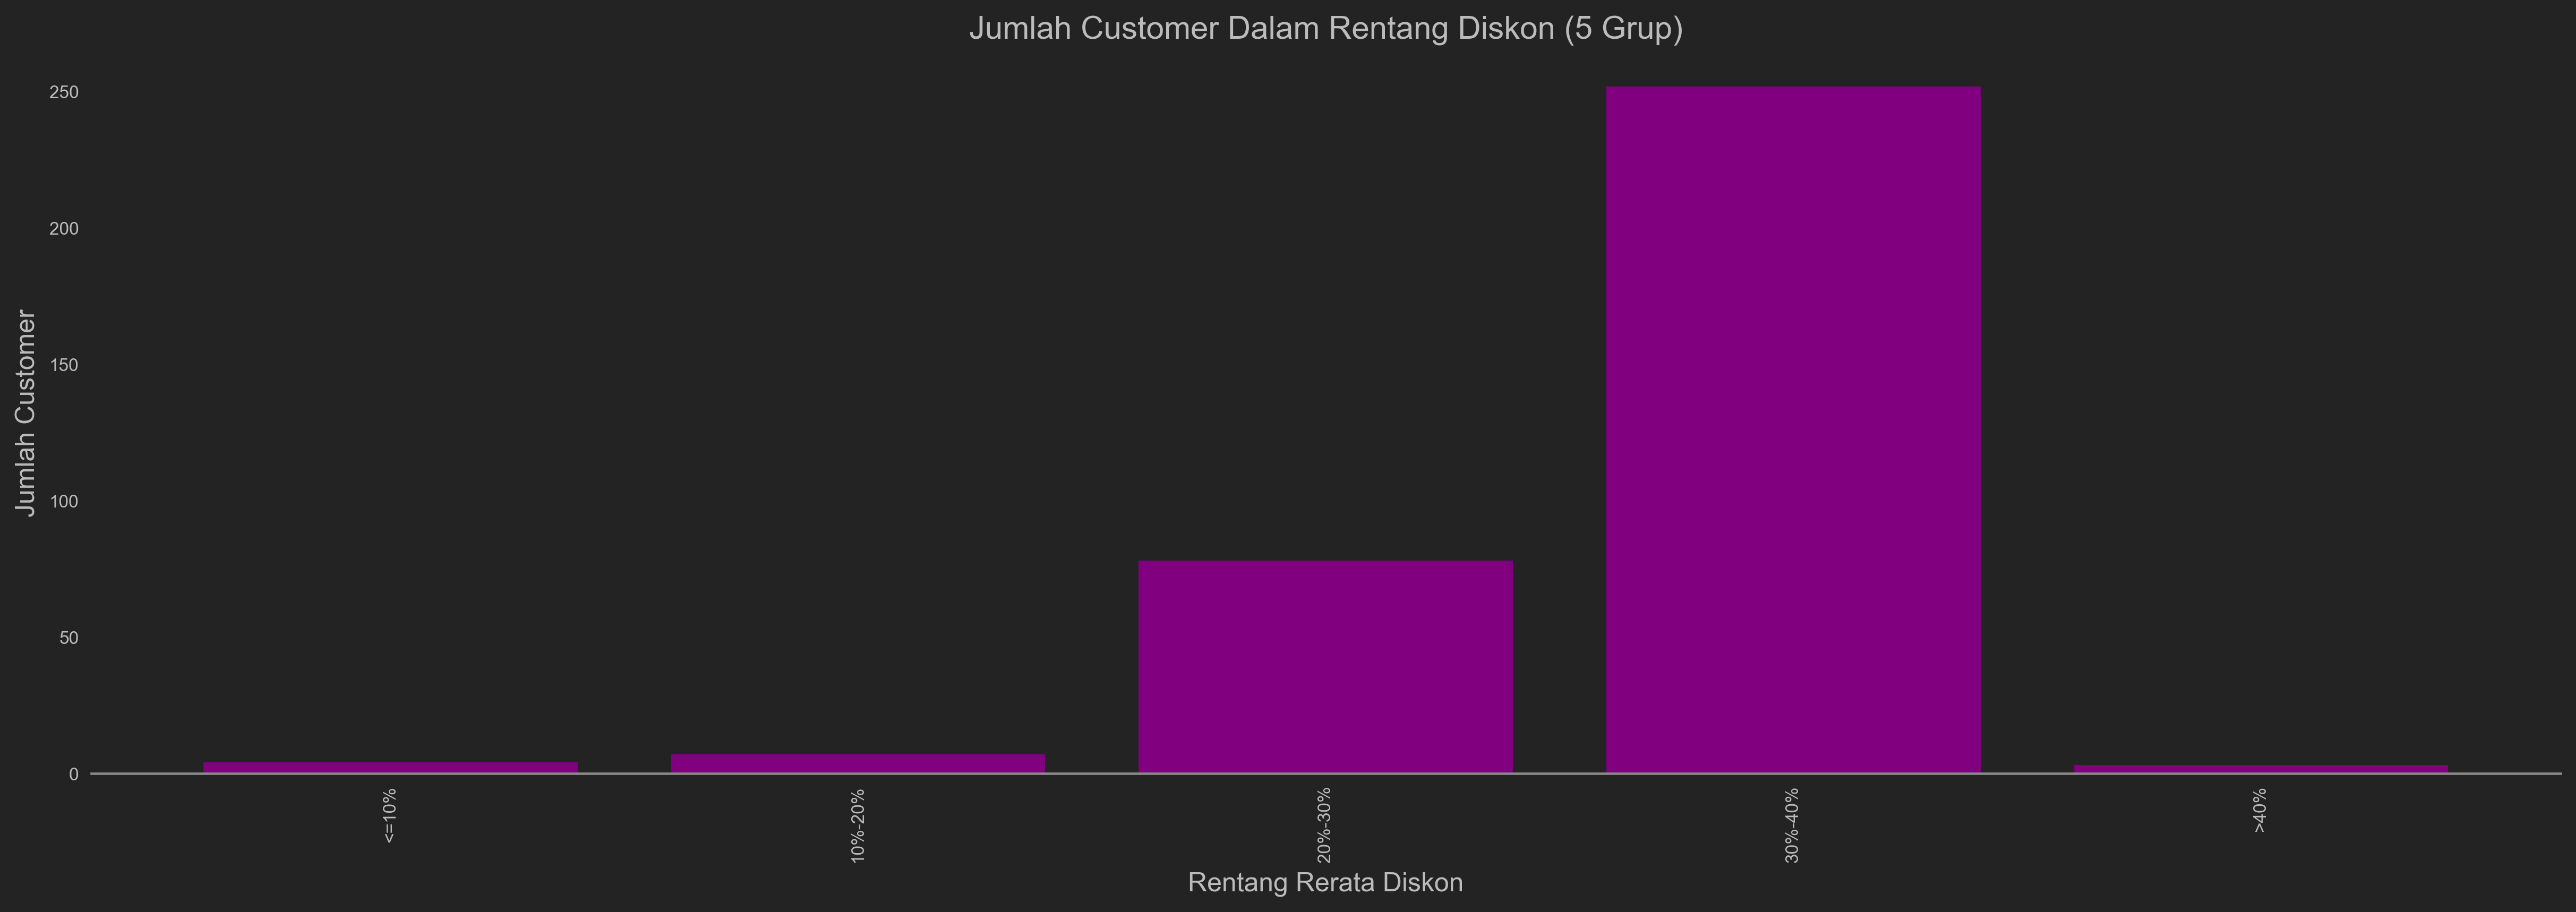

In [24]:
# pengelompokan berdasar range diskon
n_grup = 5
batas_atas = 0.5 # berdasarkan tingkat diskon penjualan normal

x = []
y = []

for numerator in range(n_grup):
    if numerator == 0:
        x.append("<=" + format(((numerator + 1) / n_grup) * batas_atas, '.0%'))
        y.append(len(disc_rerata_cust[disc_rerata_cust['rerata_disc'] <= ((numerator + 1) / n_grup) * batas_atas]))
    elif numerator + 1 == n_grup:
        x.append(">" + format(((numerator) / n_grup) * batas_atas, '.0%'))
        y.append(len(disc_rerata_cust[disc_rerata_cust['rerata_disc'] > ((numerator) / n_grup) * batas_atas]))
    else:
        x.append(format(((numerator) / n_grup) * batas_atas, '.0%') + "-" + format(((numerator + 1) / n_grup) * batas_atas, '.0%'))
        y.append(len(disc_rerata_cust[(disc_rerata_cust['rerata_disc'] > (numerator / n_grup) * batas_atas) & (disc_rerata_cust['rerata_disc'] <= ((numerator + 1) / n_grup) * batas_atas)]))

plt.figure(figsize=(20, 6))
plt.bar(x,y, color='purple')
plt.grid(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title(f'Jumlah Customer Dalam Rentang Diskon ({n_grup} Grup)')
plt.xlabel("Rentang Rerata Diskon", fontsize=12)
plt.ylabel("Jumlah Customer", fontsize=12)
plt.xticks(fontsize=8, rotation='vertical')
plt.yticks(fontsize=8)
plt.show()

### IV.b.4 ANALISA BERDASAR BRAND

#### IV.b.4.1 ANALISA TINGKAT DISKON PER BARIS TRANSAKSI PER BRAND

In [25]:
data_disc_per_baris_by_brand = data_terpilih_normal[['brand_m', 'discount_per_baris', 'Quantity', 'Net', 'frekuensi_transaksi']].groupby(['brand_m', 'discount_per_baris']).sum()
with pd.option_context('display.max_rows', None):
    print(data_disc_per_baris_by_brand)

                             Quantity                Net  frekuensi_transaksi
brand_m discount_per_baris                                                   
LOT     0.28                     0.00       8,278,344.00                   13
        0.30                     0.00      39,019,400.00                   25
        0.35                    25.00       3,248,375.00                    6
        0.40                     1.00         300,000.00                    1
        0.40                 1,290.00     468,969,240.00                  154
        0.45                   368.00     104,407,600.00                  163
        0.50                    17.00       4,250,000.00                   12
MIT     0.25                     4.00         899,400.00                    1
        0.30                   200.00      41,972,000.00                    1
        0.35                   281.00      76,105,120.00                   20
        0.37                     9.00       2,581,866.00        

#### IV.b.4.2 ANALISA TINGKAT DISKON KESELURUHAN TRANSAKSI PER BRAND

In [26]:
data_disc_by_brand = data_terpilih_normal[['brand_m', 'Quantity', 'Bruto', 'Net', 'Cogs', 'frekuensi_transaksi']].groupby(['brand_m']).sum()
data_disc_by_brand['discount'] = (data_disc_by_brand['Bruto'] - data_disc_by_brand['Net']) / data_disc_by_brand['Bruto']
data_disc_by_brand['margin'] = (data_disc_by_brand['Net'] - data_disc_by_brand['Cogs'])/ data_disc_by_brand['Net']
data_disc_by_brand

,Quantity,Bruto,Net,Cogs,frekuensi_transaksi,discount,margin
brand_m,,,,,,,
LOT,"1,701.00","1,052,682,800.00","628,472,959.00","126,852,412.86",374,0.40,0.80
MIT,"8,560.00","3,276,182,400.00","1,840,621,067.50","1,215,615,309.43",85,0.44,0.34
MIZ,"79,120.00","69,090,372,400.00","46,700,848,195.00","28,385,922,340.96",15098,0.32,0.39
PIE,"163,809.00","39,010,925,200.00","27,422,279,575.00","18,524,145,457.64",31383,0.30,0.32
SPE,"1,601,011.00","511,234,777,799.91","341,757,300,528.12","224,241,426,779.32",226048,0.33,0.34


### IV.b.5 ANALISA BERDASAR PRODUCT DIVISION

#### IV.b.5.1 ANALISA TINGKAT DISKON PER BARIS TRANSAKSI PER PRODUCT DIVISION

In [27]:
data_disc_per_baris_by_div = data_terpilih_normal[['division', 'discount_per_baris', 'Quantity', 'Net', 'frekuensi_transaksi']].groupby(['division', 'discount_per_baris']).sum()
with pd.option_context('display.max_rows', None):
    print(data_disc_per_baris_by_div)

                              Quantity                Net  frekuensi_transaksi
division discount_per_baris                                                   
A        -0.00                    2.00         700,000.00                    2
         0.00                28,712.00   3,049,894,800.00                  120
         0.20                    53.00       4,759,520.00                    6
         0.25                   112.00       6,763,200.00                   10
         0.30                 1,079.00     119,475,440.00                   90
         0.33                     2.00         187,332.00                    1
         0.33                    84.00       8,399,856.36                    5
         0.33                   283.00      28,299,516.07                    6
         0.35                46,495.00   1,972,461,660.00                 2728
         0.37                   384.00      13,305,567.60                    3
         0.37                 7,818.00     203,216,7

#### IV.b.5.2 ANALISA TINGKAT DISKON KESELURUHAN TRANSAKSI PER PRODUCT DIVISION

In [28]:
data_disc_by_div = data_terpilih_normal[['division', 'Quantity', 'Bruto', 'Net', 'Cogs', 'frekuensi_transaksi']].groupby(['division']).sum()
data_disc_by_div['discount'] = (data_disc_by_div['Bruto'] - data_disc_by_div['Net']) / data_disc_by_div['Bruto']
data_disc_by_div['margin'] = (data_disc_by_div['Net'] - data_disc_by_div['Cogs'])/ data_disc_by_div['Net']
data_disc_by_div

,Quantity,Bruto,Net,Cogs,frekuensi_transaksi,discount,margin
division,,,,,,,
A,"470,637.00","29,505,034,299.92","19,203,190,414.36","12,861,050,922.61",15859,0.35,0.33
F,"1,103,448.00","541,363,227,900.00","366,080,944,596.34","238,880,790,420.64",246658,0.32,0.35
H,"280,116.00","52,796,678,399.99","33,065,387,313.92","20,752,120,956.96",10471,0.37,0.37


## IV.c PENJUALAN DISKON

In [29]:
print(data_terpilih_diskon.describe())

       Quantity          Bruto            Net           Cogs         Profit  \
count 39,292.00      40,198.00      40,198.00      40,198.00      40,198.00   
mean      22.65   8,620,474.30   3,265,936.54   3,056,459.80     209,476.74   
std       91.99  19,427,655.85   7,021,854.55   6,780,907.16   1,215,167.12   
min        1.00      18,800.00       2,480.00    -663,997.65 -22,692,737.43   
25%        2.00     999,800.00     399,200.00     363,762.71     -20,992.57   
50%        5.00   2,499,000.00     963,336.00     885,980.04      59,391.00   
75%       16.00   7,498,000.00   2,998,500.00   2,723,261.58     247,366.10   
max    7,800.00 469,747,800.00 153,753,600.00 146,958,325.09  32,250,350.87   

       discount_per_baris  margin_per_baris  frekuensi_transaksi  
count           40,198.00         40,198.00            40,198.00  
mean                 0.61              0.01                 1.00  
std                  0.09              0.72                 0.00  
min                 

### IV.c.1 ANALISA BERDASAR TINGKAT DISKON PER BARIS TRANSAKSI

In [30]:
net_berdasar_disc = data_terpilih_diskon[['discount_per_baris', 'Net', 'frekuensi_transaksi']].groupby(['discount_per_baris']).sum()
with pd.option_context('display.max_rows', None):
    print(net_berdasar_disc.sort_values(by=['Net'], ascending=False))

                                 Net  frekuensi_transaksi
discount_per_baris                                       
0.56               38,720,597,784.00                 9719
0.60               19,872,126,000.00                 4845
0.70               19,083,909,840.00                 6132
0.53               10,334,672,644.00                 6974
0.65                9,193,324,595.00                 2152
0.50                7,326,544,350.00                 3773
0.57                4,433,320,945.00                  118
0.68                3,843,193,770.00                  475
0.75                3,712,791,050.00                 1188
0.72                3,178,831,040.00                  227
0.55                2,053,299,330.00                  377
0.80                1,518,640,100.00                 1234
0.72                  697,939,536.00                  182
0.51                  367,339,341.60                   42
0.75                  274,068,233.46                   20
0.51          

In [31]:
print(net_berdasar_disc.describe())

                    Net  frekuensi_transaksi
count            251.00               251.00
mean     523,044,290.93               160.15
std    3,162,849,765.00               938.36
min           10,000.00                 1.00
25%          325,000.00                 2.00
50%        5,550,000.00                 7.00
75%       62,357,549.50                14.00
max   38,720,597,784.00             9,719.00


### IV.c.2 ANALISA BERDASAR CUSTOMER

In [32]:
net_berdasar_cust = data_terpilih_diskon[['Id Cust', 'Net']].groupby(['Id Cust']).sum()

#### IV.c.2.1 TOTAL NILAI NET SALES

In [33]:
net_berdasar_cust.sum()

Net   131,284,117,022.47
dtype: float64

#### IV.c.2.2 NET SALES BERDASAR CUSTOMER

In [34]:
print(net_berdasar_cust.describe())

                    Net
count            115.00
mean   1,141,601,017.59
std    6,965,217,965.40
min          143,640.00
25%        4,345,050.00
50%       25,118,500.00
75%      232,819,405.00
max   69,930,793,638.09


#### IV.c.2.3 CUSTOMER DENGAN NILAI TOTAL PENJUALAN DI ATAS RATA - RATA
<i>Berikut adalah kontribusi net sales 2020 - 2022 YTD untuk customer dengan total nilai net sales di atas nilai rata - rata net sales dari semua customer (kecuali PT Prestasi Retail Innovation - 220P001)</i>

In [35]:
# Menslice customer dengan total nilai Net Sales di atas rata - rata Net Sales
cust_diatas_rerata = net_berdasar_cust.loc[(net_berdasar_cust['Net'] > net_berdasar_cust['Net'].mean()) & 
                                           (net_berdasar_cust.index != "220P001")].sort_values(by=['Net'], ascending=False)
net_mean = net_berdasar_cust['Net'].mean()
total_cust = net_berdasar_cust['Net'].count()
total_cust_diatas_rerata = cust_diatas_rerata['Net'].count()

with pd.option_context('display.max_rows', None):
    print(f'Berikut adalah daftar customer dengan total penjualan di atas rata - rata total penjualan periode {periode} (Rp {format_float0(net_mean)}): \n'
          f'Jumlah customer di atas rata - rata {total_cust_diatas_rerata} orang dari total customer {total_cust} orang\n{cust_diatas_rerata}')

Berikut adalah daftar customer dengan total penjualan di atas rata - rata total penjualan periode 2020 - 2022 YTD (Rp 1,141,601,018): 
Jumlah customer di atas rata - rata 11 orang dari total customer 115 orang
                      Net
Id Cust                  
104A019 26,776,257,547.38
101B022  4,624,626,480.00
101G018  3,337,969,270.00
101D010  3,017,423,320.00
105O004  2,949,382,470.00
101K011  2,687,054,410.00
102T004  1,689,818,840.00
112F001  1,581,125,390.00
101G012  1,429,235,320.00
101K003  1,373,406,860.00
101S014  1,298,662,130.00


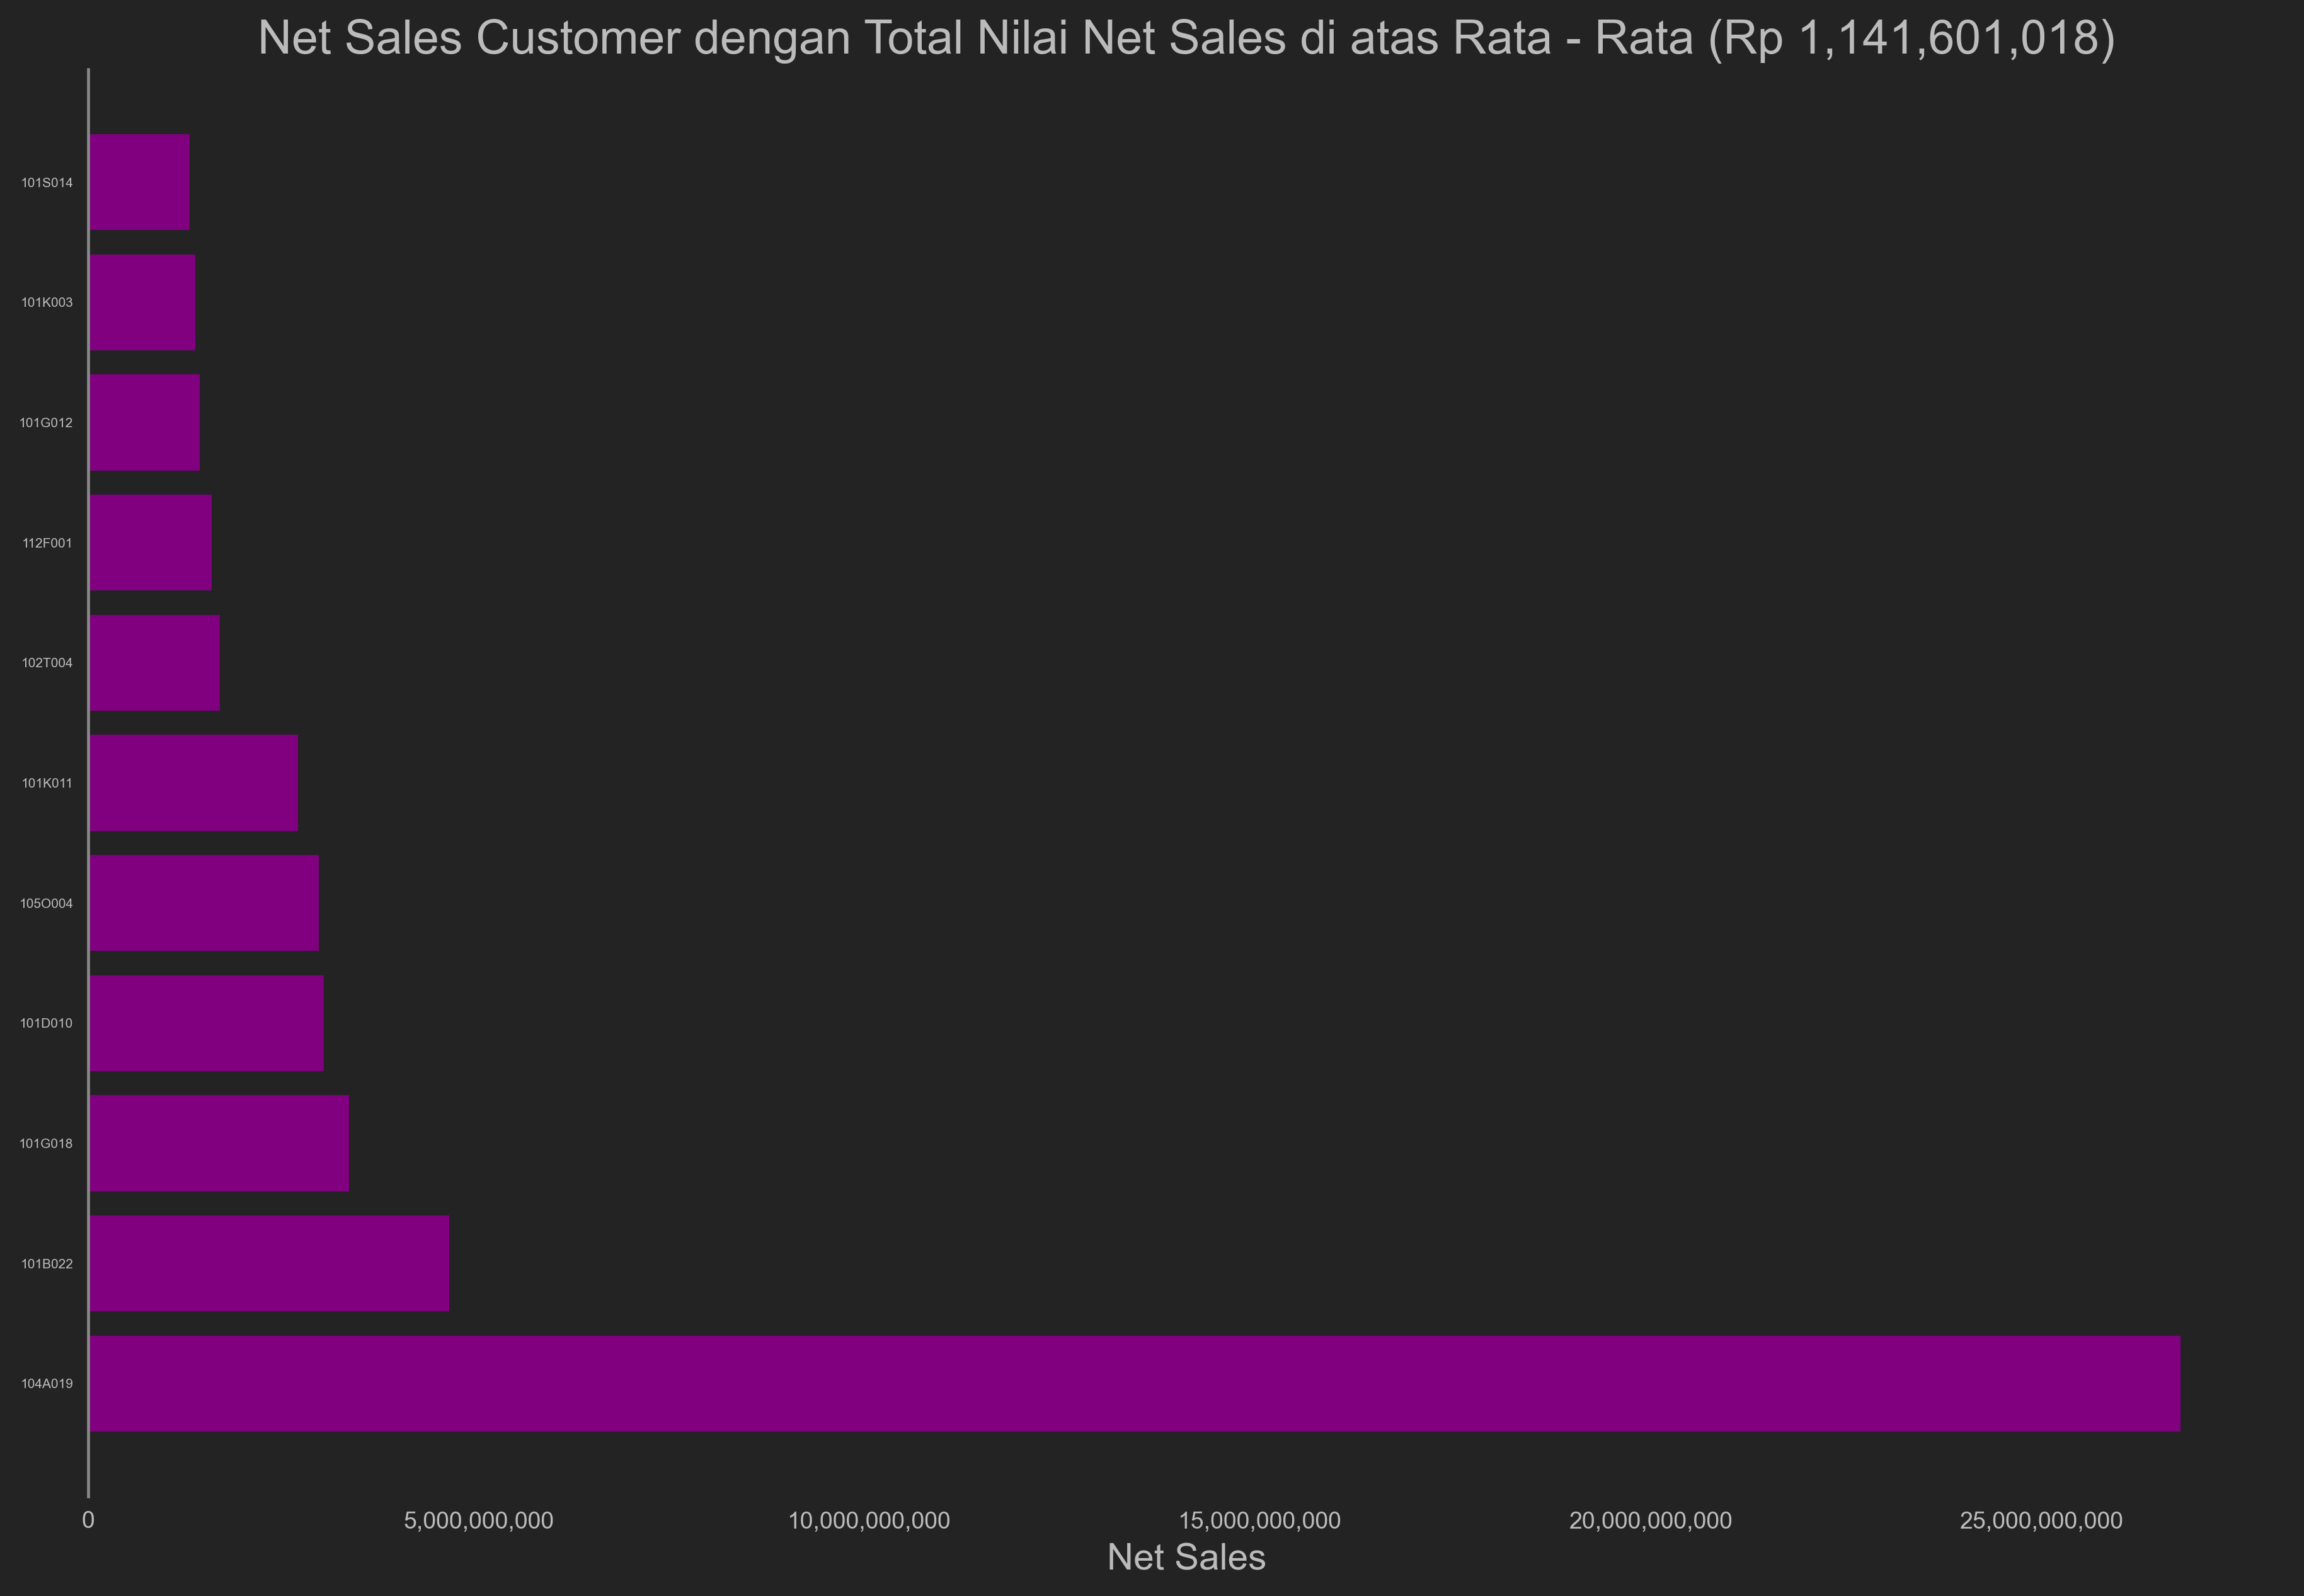

In [36]:
plt.figure(figsize=(15,10))
plt.barh(cust_diatas_rerata.index, cust_diatas_rerata['Net'], color='purple')
plt.xlabel("Net Sales", fontsize=14)
plt.title(f"Net Sales Customer dengan Total Nilai Net Sales di atas Rata - Rata (Rp {format_float0(net_berdasar_cust['Net'].mean())})", fontsize=18)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)
plt.yticks(fontsize=5)
plt.xticks(fontsize=9)
plt.show()

#### IV.c.2.4 TOP 3 CUSTOMER

In [37]:
net_berdasar_disc_cust = data_terpilih_diskon[['Id Cust', 'discount_per_baris', 'Net']].groupby(['Id Cust', 'discount_per_baris']).sum()
print(net_berdasar_disc_cust.iloc[net_berdasar_disc_cust.index.get_level_values('Id Cust') == '104A019'])
print(net_berdasar_disc_cust.iloc[net_berdasar_disc_cust.index.get_level_values('Id Cust') == '101B022'])
print(net_berdasar_disc_cust.iloc[net_berdasar_disc_cust.index.get_level_values('Id Cust') == '101G018'])

                                        Net
Id Cust discount_per_baris                 
104A019 0.50               1,320,107,800.00
        0.57               3,743,983,780.00
        0.60               2,495,346,160.00
        0.65               5,653,080,930.00
        0.68               3,737,870,760.00
        0.70                  66,145,581.18
        0.70                  32,847,805.62
        0.70               3,885,770,880.00
        0.72               3,169,337,600.00
        0.75                  21,601,437.12
        0.75                 274,068,233.46
        0.75               2,015,911,900.00
        0.80                 360,184,680.00
                                        Net
Id Cust discount_per_baris                 
101B022 0.60               1,781,371,680.00
        0.70               2,642,183,400.00
        0.80                 201,071,400.00
                                        Net
Id Cust discount_per_baris                 
101G018 0.50                  99

### IV.c.3 ANALISA BERDASAR TINGKAT DISKON KESELURUHAN TRANSAKSI

In [38]:
disc_rerata_cust = data_terpilih_diskon[['Id Cust', 'Quantity', 'Bruto', 'Net', 'Cogs', 'frekuensi_transaksi']].groupby(['Id Cust']).sum()
disc_rerata_cust['rerata_disc'] = (disc_rerata_cust['Bruto'] - disc_rerata_cust['Net']) / disc_rerata_cust['Bruto']
disc_rerata_cust['rerata_margin'] = (disc_rerata_cust['Net'] - disc_rerata_cust['Cogs']) / disc_rerata_cust['Net']
disc_rerata_cust['rerata_spending'] = (disc_rerata_cust['Bruto'] / disc_rerata_cust['Quantity'])
disc_rerata_cust['ATV'] = disc_rerata_cust['Net'] / disc_rerata_cust['frekuensi_transaksi']
disc_rerata_cust.sort_values(by='rerata_disc', ascending=False)
disc_rerata_cust

,Quantity,Bruto,Net,Cogs,frekuensi_transaksi,rerata_disc,rerata_margin,rerata_spending,ATV
Id Cust,,,,,,,,,
1.02E+11,12.00,"4,197,600.00","1,679,040.00","1,825,261.42",6,0.60,-0.09,"349,800.00","279,840.00"
101B003,"3,829.00","1,433,794,000.00","502,835,180.00","463,826,522.61",21,0.65,0.08,"374,456.52","23,944,532.38"
101B010,349.00,"151,140,200.00","58,840,180.00","32,674,498.89",103,0.61,0.44,"433,066.48","571,263.88"
101B013,24.00,"6,715,200.00","3,357,600.00","1,805,816.98",1,0.50,0.46,"279,800.00","3,357,600.00"
101B014,213.00,"78,897,400.00","27,763,780.00","20,573,178.64",57,0.65,0.26,"370,410.33","487,083.86"
...,...,...,...,...,...,...,...,...,...
112H001,13.00,"2,597,400.00","779,220.00","708,381.82",4,0.70,0.09,"199,800.00","194,805.00"
112K006,"3,125.00","984,104,100.00","298,704,130.00","216,259,696.97",735,0.70,0.28,"314,913.31","406,400.18"
112P009,2.00,"1,399,800.00","600,000.00","485,373.75",2,0.57,0.19,"699,900.00","300,000.00"


In [39]:
disc_rerata_cust.nunique()

Quantity                86
Bruto                   96
Net                     96
Cogs                   105
frekuensi_transaksi     65
rerata_disc             60
rerata_margin          100
rerata_spending         79
ATV                     97
dtype: int64

In [40]:
disc_rerata_cust['rerata_disc'].unique()

array([0.6       , 0.64929747, 0.6106914 , 0.5       , 0.64810273,
       0.67583025, 0.6615176 , 0.63426643, 0.56318376, 0.6011235 ,
       0.63145207, 0.65651649, 0.59062135, 0.58116171, 0.64624519,
       0.62315801, 0.7       , 0.67367856, 0.5985259 , 0.64334359,
       0.65773422, 0.64806519, 0.65289973, 0.65659627, 0.6864956 ,
       0.50575496, 0.65      , 0.58773588, 0.59905567, 0.64691517,
       0.69841295, 0.66091541, 0.61451217, 0.67690575, 0.54706863,
       0.58874669, 0.68927406, 0.64464286, 0.607343  , 0.66469227,
       0.52458131, 0.55224595, 0.6281293 , 0.67022215, 0.52833333,
       0.56974829, 0.515484  , 0.58133036, 0.58442229, 0.58817725,
       0.53989474, 0.5853363 , 0.69384243, 0.66111081, 0.59801175,
       0.69409437, 0.696471  , 0.57136734, 0.83678549, 0.57991181])

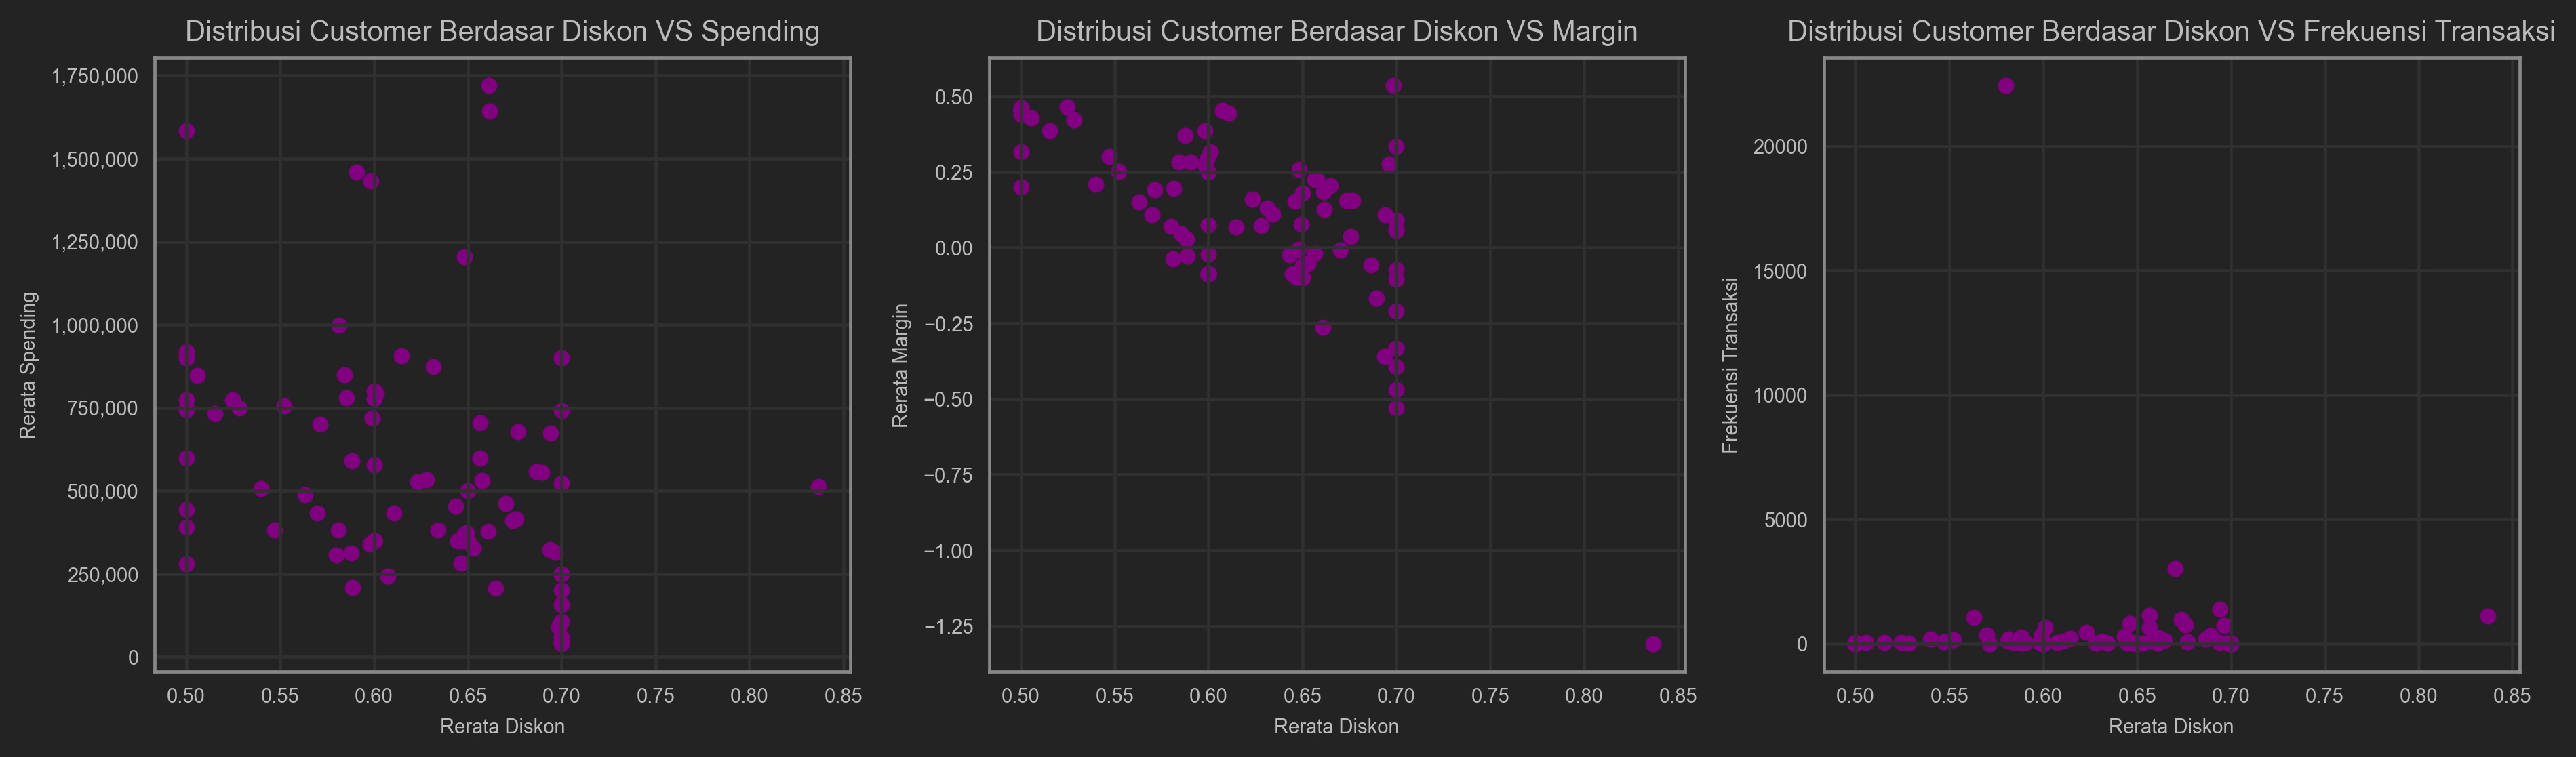

In [41]:
fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(disc_rerata_cust['rerata_disc'], disc_rerata_cust['rerata_spending'], c='purple')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_title('Distribusi Customer Berdasar Diskon VS Spending', fontsize=10)
ax1.set_xlabel('Rerata Diskon', fontsize=7)
ax1.set_ylabel('Rerata Spending', fontsize=7)
ax1.xaxis.set_tick_params(labelsize=7)
ax1.yaxis.set_tick_params(labelsize=7)

ax2.scatter(disc_rerata_cust['rerata_disc'], disc_rerata_cust['rerata_margin'], c='purple')
# ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.set_title('Distribusi Customer Berdasar Diskon VS Margin', fontsize=10)
ax2.set_xlabel('Rerata Diskon', fontsize=7)
ax2.set_ylabel('Rerata Margin', fontsize=7)
ax2.xaxis.set_tick_params(labelsize=7)
ax2.yaxis.set_tick_params(labelsize=7)

ax3.scatter(disc_rerata_cust['rerata_disc'], disc_rerata_cust['frekuensi_transaksi'], c='purple')
# ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax3.set_title('Distribusi Customer Berdasar Diskon VS Frekuensi Transaksi', fontsize=10)
ax3.set_xlabel('Rerata Diskon', fontsize=7)
ax3.set_ylabel('Frekuensi Transaksi', fontsize=7)
ax3.xaxis.set_tick_params(labelsize=7)
ax3.yaxis.set_tick_params(labelsize=7)
plt.show()

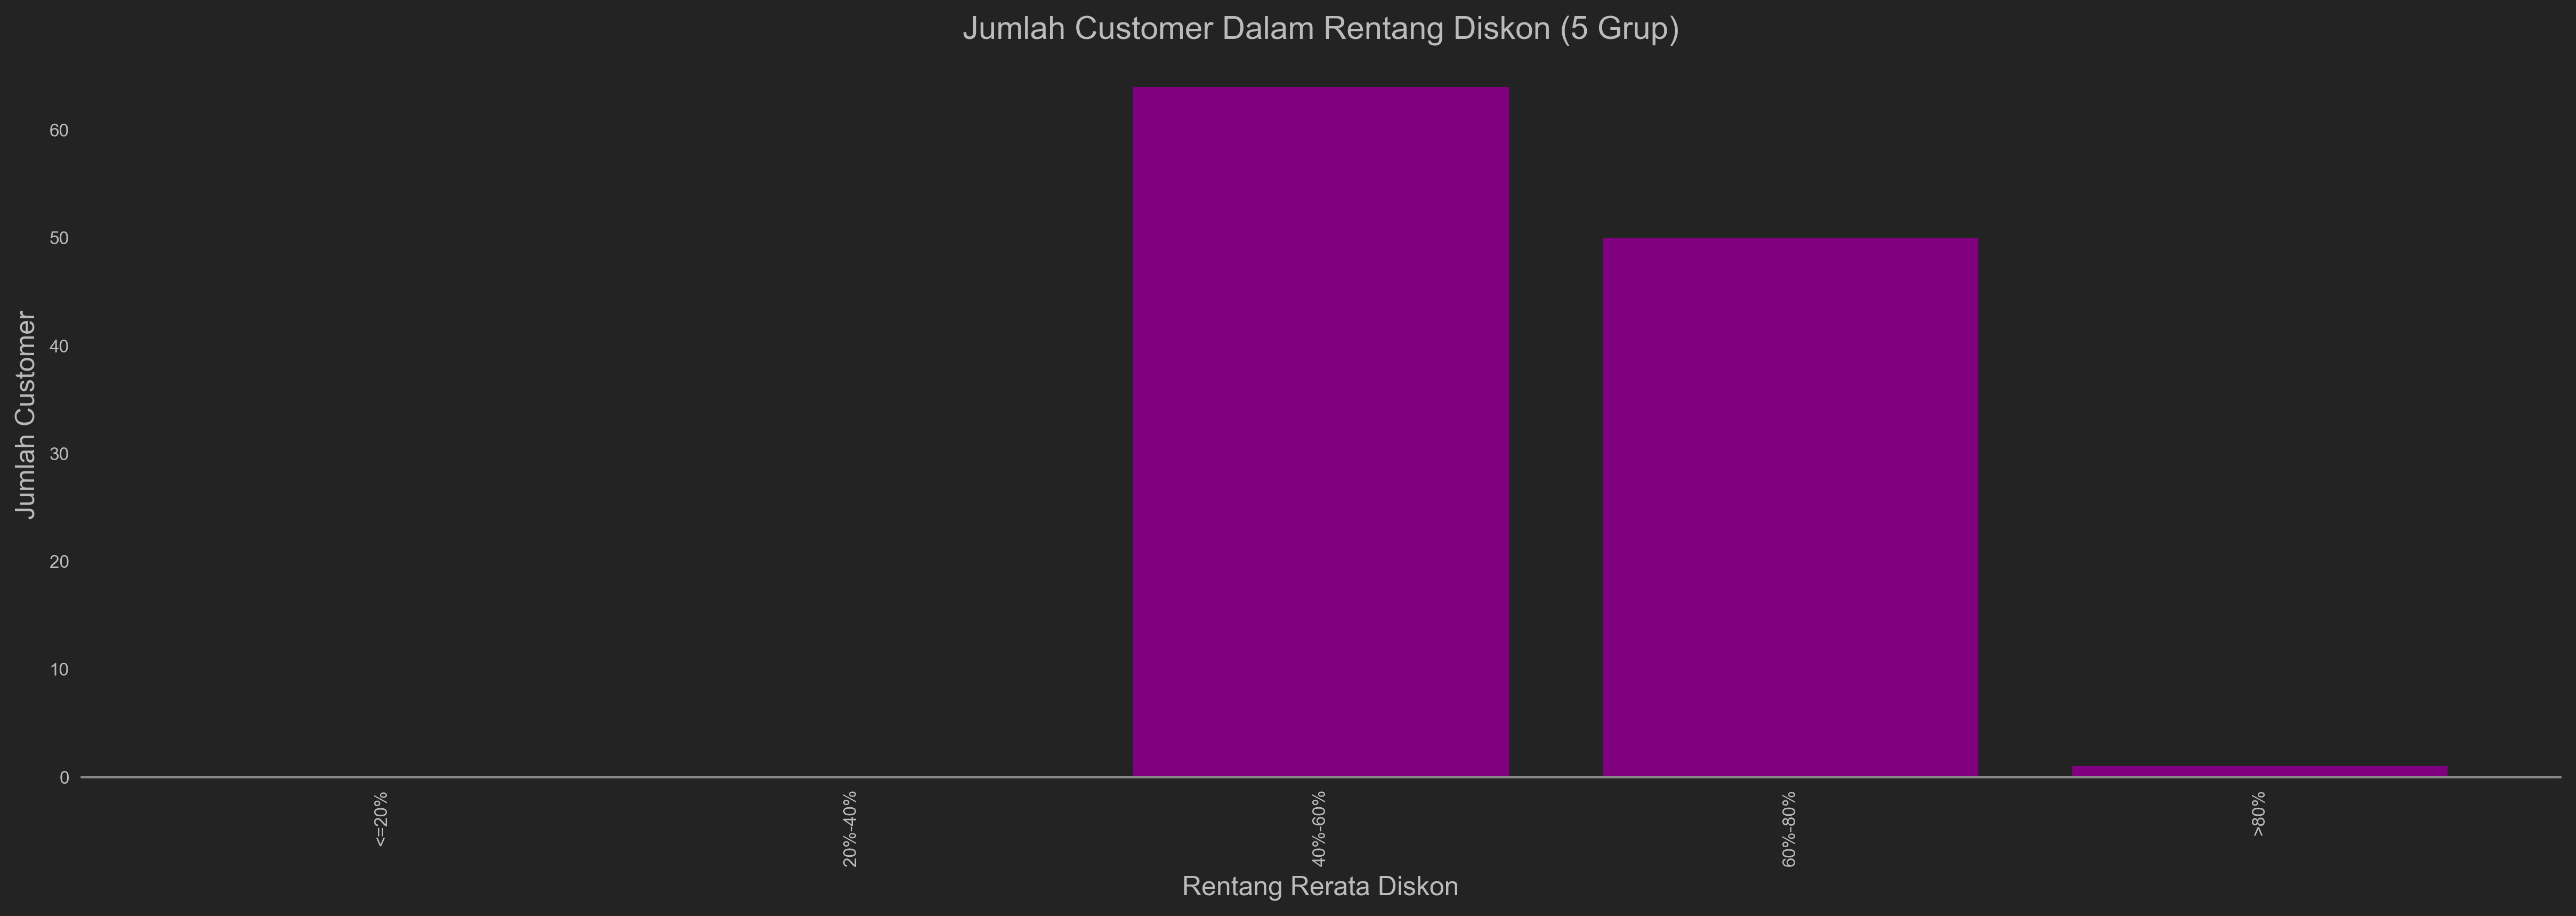

In [42]:
# pengelompokan berdasar range diskon
n_grup = 5

x = []
y = []

for numerator in range(n_grup):
    if numerator == 0:
        x.append("<=" + format((numerator + 1) / n_grup, '.0%'))
        y.append(len(disc_rerata_cust[disc_rerata_cust['rerata_disc'] <= (numerator + 1) / n_grup]))
    elif numerator + 1 == n_grup:
        x.append(">" + format((numerator) / n_grup, '.0%'))
        y.append(len(disc_rerata_cust[disc_rerata_cust['rerata_disc'] > (numerator) / n_grup]))
    else:
        x.append(format((numerator) / n_grup, '.0%') + "-" + format((numerator + 1) / n_grup, '.0%'))
        y.append(len(disc_rerata_cust[(disc_rerata_cust['rerata_disc'] > numerator / n_grup) & (disc_rerata_cust['rerata_disc'] <= (numerator + 1) / n_grup)]))

plt.figure(figsize=(20, 6))
plt.bar(x,y, color='purple')
plt.grid(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title(f'Jumlah Customer Dalam Rentang Diskon ({n_grup} Grup)')
plt.xlabel("Rentang Rerata Diskon", fontsize=12)
plt.ylabel("Jumlah Customer", fontsize=12)
plt.xticks(fontsize=8, rotation='vertical')
plt.yticks(fontsize=8)
plt.show()

### IV.c.4 ANALISA BERDASAR BRAND

#### IV.c.4.1 ANALISA TINGKAT DISKON PER BARIS TRANSAKSI PER BRAND

In [43]:
data_disc_per_baris_by_brand = data_terpilih_diskon[['brand_m', 'discount_per_baris', 'Quantity', 'Net', 'frekuensi_transaksi']].groupby(['brand_m', 'discount_per_baris']).sum()
with pd.option_context('display.max_rows', None):
    print(data_disc_per_baris_by_brand)

                             Quantity               Net  frekuensi_transaksi
brand_m discount_per_baris                                                  
BOD     0.85                    15.00        623,550.00                   10
        0.90                     5.00        100,000.00                    2
        0.92                    24.00        480,000.00                   12
LOT     0.50                 1,678.00    235,263,750.00                  120
        0.52                   399.00    210,480,480.00                   18
        0.56                     1.00        350,000.00                    1
        0.58                    16.00      4,000,000.00                   11
        0.60                13,794.00  3,600,211,040.00                  407
        0.65                 1,332.00    302,661,625.00                   40
        0.70                18,389.00  1,657,946,850.00                 1101
        0.75                    24.00        240,000.00                    5

#### IV.c.4.2 ANALISA TINGKAT DISKON KESELURUHAN TRANSAKSI PER BRAND

In [44]:
data_disc_by_brand = data_terpilih_diskon[['brand_m', 'Quantity', 'Bruto', 'Net', 'Cogs', 'frekuensi_transaksi']].groupby(['brand_m']).sum()
data_disc_by_brand['discount'] = (data_disc_by_brand['Bruto'] - data_disc_by_brand['Net']) / data_disc_by_brand['Bruto']
data_disc_by_brand['margin'] = (data_disc_by_brand['Net'] - data_disc_by_brand['Cogs'])/ data_disc_by_brand['Net']
data_disc_by_brand

,Quantity,Bruto,Net,Cogs,frekuensi_transaksi,discount,margin
brand_m,,,,,,,
BOD,44.00,"11,151,200.00","1,203,550.00","1,362,000.01",24,0.89,-0.13
LOT,"39,529.00","19,156,937,600.00","6,614,450,685.00","5,306,248,154.54",2270,0.65,0.20
MIT,"2,118.00","886,423,700.00","379,366,214.00","293,479,915.53",51,0.57,0.23
MIZ,"58,638.00","68,948,013,000.00","26,490,050,941.00","21,882,573,089.01",8652,0.62,0.17
PIE,"163,074.00","52,269,561,800.00","20,065,722,817.38","20,007,196,529.37",6943,0.62,0.00
SPE,"626,703.00","205,253,738,699.85","77,733,322,815.09","75,372,711,454.86",22258,0.62,0.03


### IV.c.5 ANALISA BERDASAR PRODUCT DIVISION

#### IV.c.5.1 ANALISA TINGKAT DISKON PER BARIS TRANSAKSI PER PRODUCT DIVISION

In [45]:
data_disc_per_baris_by_div = data_terpilih_diskon[['division', 'discount_per_baris', 'Quantity', 'Net', 'frekuensi_transaksi']].groupby(['division', 'discount_per_baris']).sum()
with pd.option_context('display.max_rows', None):
    print(data_disc_per_baris_by_div)

                              Quantity               Net  frekuensi_transaksi
division discount_per_baris                                                  
A        0.50                   498.00     37,505,200.00                   40
         0.53                 9,989.00    728,649,084.00                 1057
         0.53                    10.00        434,860.80                    4
         0.54                     5.00        250,000.00                    3
         0.56                   564.00      6,154,368.00                    1
         0.56                   576.00      6,285,312.00                    1
         0.56                   612.00      6,678,144.00                    1
         0.56                   708.00      7,725,696.00                    1
         0.56                   720.00      7,856,640.00                    1
         0.56                 1,800.00     19,641,600.00                    1
         0.56                   960.00     10,475,520.00        

#### IV.c.5.2 ANALISA TINGKAT DISKON KESELURUHAN TRANSAKSI PER PRODUCT DIVISION

In [46]:
data_disc_by_div = data_terpilih_diskon[['division', 'Quantity', 'Bruto', 'Net', 'Cogs', 'frekuensi_transaksi']].groupby(['division']).sum()
data_disc_by_div['discount'] = (data_disc_by_div['Bruto'] - data_disc_by_div['Net']) / data_disc_by_div['Bruto']
data_disc_by_div['margin'] = (data_disc_by_div['Net'] - data_disc_by_div['Cogs'])/ data_disc_by_div['Net']
data_disc_by_div

,Quantity,Bruto,Net,Cogs,frekuensi_transaksi,discount,margin
division,,,,,,,
A,"223,108.00","19,386,819,899.87","7,666,378,221.80","6,915,905,033.49",4653,0.60,0.10
F,"572,895.00","312,193,897,900.00","117,790,558,821.27","111,145,069,801.97",34508,0.62,0.06
H,"94,103.00","14,945,108,199.98","5,827,179,979.40","4,802,596,307.86",1037,0.61,0.18
